<a href="https://colab.research.google.com/github/Munchkinland/Data-Preprocessing-Analysis-for-the-Used-Car-Market/blob/main/UC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Price variation by brand, kms, etc

Paso 1.Importación, carga y consolidación de datos

In [104]:
#import data
#https://4geeks.com/es/syllabus/spain-ds-pt-3/read/analisis-y-limpieza-de-datos-exploratorios-con-titanic
import pandas as pd

In [105]:
#Comparar si los data sets tienen el mismo numero de columnas para utilizar concat o merge
audi = pd.read_csv("audi.csv")
bmw = pd.read_csv("bmw.csv")

columns_audi = audi.columns.tolist()
columns_bmw = bmw.columns.tolist()
columns_audi

audi.info()
bmw.info()

if columns_audi == columns_bmw:
    print("Ambos DataFrames tienen las mismas columnas aplica concat.")
else:
    print("Los DataFrames tienen columnas diferentes aplica merge.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-nul

In [106]:
#Carga de todos data frames
audi = pd.read_csv("audi.csv")
bmw = pd.read_csv("bmw.csv")
cclass = pd.read_csv("cclass.csv")
focus = pd.read_csv("focus.csv")
ford = pd.read_csv("ford.csv")
hyundi = pd.read_csv("hyundi.csv")
merc = pd.read_csv("merc.csv")
skoda = pd.read_csv("skoda.csv")
toyota = pd.read_csv("toyota.csv")
unclean_cclass = pd.read_csv("unclean_cclass.csv")
unclean_focus = pd.read_csv("unclean_focus.csv")
vauxhall = pd.read_csv("vauxhall.csv")
vw = pd.read_csv("vw.csv")

#consolidad todos los data frames
data_frames = [audi, bmw, cclass, focus, ford, hyundi, merc, skoda, toyota, unclean_cclass, unclean_focus, vauxhall, vw]

# Concatena los DataFrames verticalmente
merged_df = pd.concat(data_frames, ignore_index=True)

In [107]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118150 entries, 0 to 118149
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         117995 non-null  object 
 1   year          117903 non-null  float64
 2   price         117995 non-null  object 
 3   transmission  117995 non-null  object 
 4   mileage       117077 non-null  object 
 5   fuelType      108540 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   tax(£)        4860 non-null    float64
 10  fuel type     3517 non-null    object 
 11  engine size   9345 non-null    object 
 12  mileage2      9399 non-null    object 
 13  fuel type2    8537 non-null    object 
 14  engine size2  8537 non-null    object 
 15  reference     9455 non-null    object 
dtypes: float64(5), object(11)
memory usage: 14.4+ MB


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,A1,2017.0,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A6,2016.0,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A1,2016.0,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,2017.0,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A3,2019.0,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Paso 2: Exploración y limpieza de datos

In [108]:
#Localizacion de duplicados
duplicados = merged_df[merged_df.duplicated()]
print(duplicados)
merged_df.info()

           model    year  price transmission mileage fuelType    tax   mpg  \
273           Q3  2019.0  34485    Automatic      10   Diesel  145.0  47.1   
764           Q2  2019.0  22495       Manual    1000   Diesel  145.0  49.6   
784           Q3  2015.0  13995       Manual   35446   Diesel  145.0  54.3   
967           Q5  2019.0  31998    Semi-Auto     100   Petrol  145.0  33.2   
990           Q2  2019.0  22495       Manual    1000   Diesel  145.0  49.6   
...          ...     ...    ...          ...     ...      ...    ...   ...   
117470   Golf SV  2019.0  19360    Semi-Auto    4401   Diesel  145.0  50.4   
117488   Golf SV  2019.0  22798       Manual      10   Petrol  145.0  43.5   
117491   Golf SV  2019.0  23998    Semi-Auto      10   Diesel  145.0  50.4   
117492   Golf SV  2019.0  21998    Semi-Auto      10   Petrol  145.0  42.8   
117686   Golf SV  2016.0   7999       Manual   50777   Diesel    0.0  72.4   

        engineSize  tax(£) fuel type engine size mileage2 fuel 

In [109]:
 #Limpieza de duplicados
 clean_df = merged_df.drop_duplicates()
 clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115723 entries, 0 to 118149
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         115722 non-null  object 
 1   year          115630 non-null  float64
 2   price         115722 non-null  object 
 3   transmission  115722 non-null  object 
 4   mileage       114804 non-null  object 
 5   fuelType      106267 non-null  object 
 6   tax           92938 non-null   float64
 7   mpg           97712 non-null   float64
 8   engineSize    106267 non-null  float64
 9   tax(£)        4774 non-null    float64
 10  fuel type     3517 non-null    object 
 11  engine size   9345 non-null    object 
 12  mileage2      9399 non-null    object 
 13  fuel type2    8537 non-null    object 
 14  engine size2  8537 non-null    object 
 15  reference     9455 non-null    object 
dtypes: float64(5), object(11)
memory usage: 15.0+ MB


In [110]:
import pandas as pd

#Rellenar valores nulos en 'fuel type' con valores de 'fuel type2'
clean_df['fuel type'].fillna(clean_df['fuel type2'], inplace=True)

#Rellenar valores nulos en 'engine size' con valores de 'engine size2'
clean_df['engine size'].fillna(clean_df['engine size2'], inplace=True)

#Rellenar valores nulos en 'mileage' con valores de 'mileage2'
clean_df['mileage'].fillna(clean_df['mileage2'], inplace=True)

#Eliminar columnas duplicadas y las columnas originales
clean_df.drop(['fuel type2', 'engine size2', 'mileage2'], axis=1, inplace=True)

#Eliminar columnas originales 'engine size' y 'mileage'
clean_df.drop(['engine size', 'mileage'], axis=1, inplace=True)

#Mostrar el DataFrame después de la fusión y eliminación
print("DataFrame después de la fusión y eliminación:")
print(clean_df)



DataFrame después de la fusión y eliminación:
       model    year  price transmission fuelType    tax   mpg  engineSize  \
0         A1  2017.0  12500       Manual   Petrol  150.0  55.4         1.4   
1         A6  2016.0  16500    Automatic   Diesel   20.0  64.2         2.0   
2         A1  2016.0  11000       Manual   Petrol   30.0  55.4         1.4   
3         A4  2017.0  16800    Automatic   Diesel  145.0  67.3         2.0   
4         A3  2019.0  17300       Manual   Petrol  145.0  49.6         1.0   
...      ...     ...    ...          ...      ...    ...   ...         ...   
118145   Eos  2012.0   5990       Manual   Diesel  125.0  58.9         2.0   
118146   Fox  2008.0   1799       Manual   Petrol  145.0  46.3         1.2   
118147   Fox  2009.0   1590       Manual   Petrol  200.0  42.0         1.4   
118148   Fox  2006.0   1250       Manual   Petrol  150.0  46.3         1.2   
118149   Fox  2007.0   2295       Manual   Petrol  145.0  46.3         1.2   

        tax(£) fu

<ipython-input-110-258668778355>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['fuel type'].fillna(clean_df['fuel type2'], inplace=True)
<ipython-input-110-258668778355>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['engine size'].fillna(clean_df['engine size2'], inplace=True)
<ipython-input-110-258668778355>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['mileage'].fillna(clean_df['mileage2'], inpla

In [111]:
valores_nulos = clean_df.isnull()  # También puedes usar df.isna()

print("DataFrame original:")
print("\nValores nulos:")
print(valores_nulos)

DataFrame original:

Valores nulos:
        model   year  price  transmission  fuelType    tax    mpg  engineSize  \
0       False  False  False         False     False  False  False       False   
1       False  False  False         False     False  False  False       False   
2       False  False  False         False     False  False  False       False   
3       False  False  False         False     False  False  False       False   
4       False  False  False         False     False  False  False       False   
...       ...    ...    ...           ...       ...    ...    ...         ...   
118145  False  False  False         False     False  False  False       False   
118146  False  False  False         False     False  False  False       False   
118147  False  False  False         False     False  False  False       False   
118148  False  False  False         False     False  False  False       False   
118149  False  False  False         False     False  False  False       F

In [112]:
cantidad_valores_nulos_por_columna = clean_df.isnull().sum()
print("\nCantidad de valores nulos por columna:")
print(cantidad_valores_nulos_por_columna)


Cantidad de valores nulos por columna:
model                1
year                93
price                1
transmission         1
fuelType          9456
tax              22785
mpg              18011
engineSize        9456
tax(£)          110949
fuel type       106268
reference       106268
dtype: int64


In [ ]:
# Imputar valores nulos con la media de cada columna
clean_df_imputado = clean_df.apply(lambda col: col.fillna(col.mean()) if col.dtype in [float, int] else col.fillna(col.mode()[0]))

# Mostrar el DataFrame después de la imputación
print("DataFrame después de la imputación:")
print(clean_df_imputado)
clean_df_imputado.info()


In [74]:
valores_nulos_despues = clean_df_imputado.isnull().sum()

print("Valores nulos después de la imputación:")
print(valores_nulos_despues)

Valores nulos después de la imputación:
model           0
year            0
price           0
transmission    0
fuelType        0
tax             0
mpg             0
engineSize      0
tax(£)          0
fuel type       0
reference       0
dtype: int64


In [114]:
#Eliminación de información relevante
# Seleccionar las columnas 'reference' y 'tax(£)'
selected_columns = clean_df_imputado[['reference', 'tax(£)']]
# Mostrar el DataFrame resultante
print(selected_columns)

           reference      tax(£)
0       /ad/14683175  121.187683
1       /ad/14683175  121.187683
2       /ad/14683175  121.187683
3       /ad/14683175  121.187683
4       /ad/14683175  121.187683
...              ...         ...
118145  /ad/14683175  121.187683
118146  /ad/14683175  121.187683
118147  /ad/14683175  121.187683
118148  /ad/14683175  121.187683
118149  /ad/14683175  121.187683

[115723 rows x 2 columns]


In [115]:
# Eliminar las columnas 'reference' y 'tax(£)'
clean_df_imputado.drop(['reference', 'tax(£)'], axis=1, inplace=True)

# Mostrar el DataFrame resultante
clean_df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115723 entries, 0 to 118149
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         115723 non-null  object 
 1   year          115723 non-null  float64
 2   price         115723 non-null  object 
 3   transmission  115723 non-null  object 
 4   fuelType      115723 non-null  object 
 5   tax           115723 non-null  float64
 6   mpg           115723 non-null  float64
 7   engineSize    115723 non-null  float64
 8   fuel type     115723 non-null  object 
dtypes: float64(4), object(5)
memory usage: 8.8+ MB


Paso 3: Análisis de variables univariante

In [116]:
# Limpiar la columna 'price' de caracteres no numéricos
clean_df_imputado['price'] = clean_df_imputado['price'].replace('[\£,]', '', regex=True).astype(float)

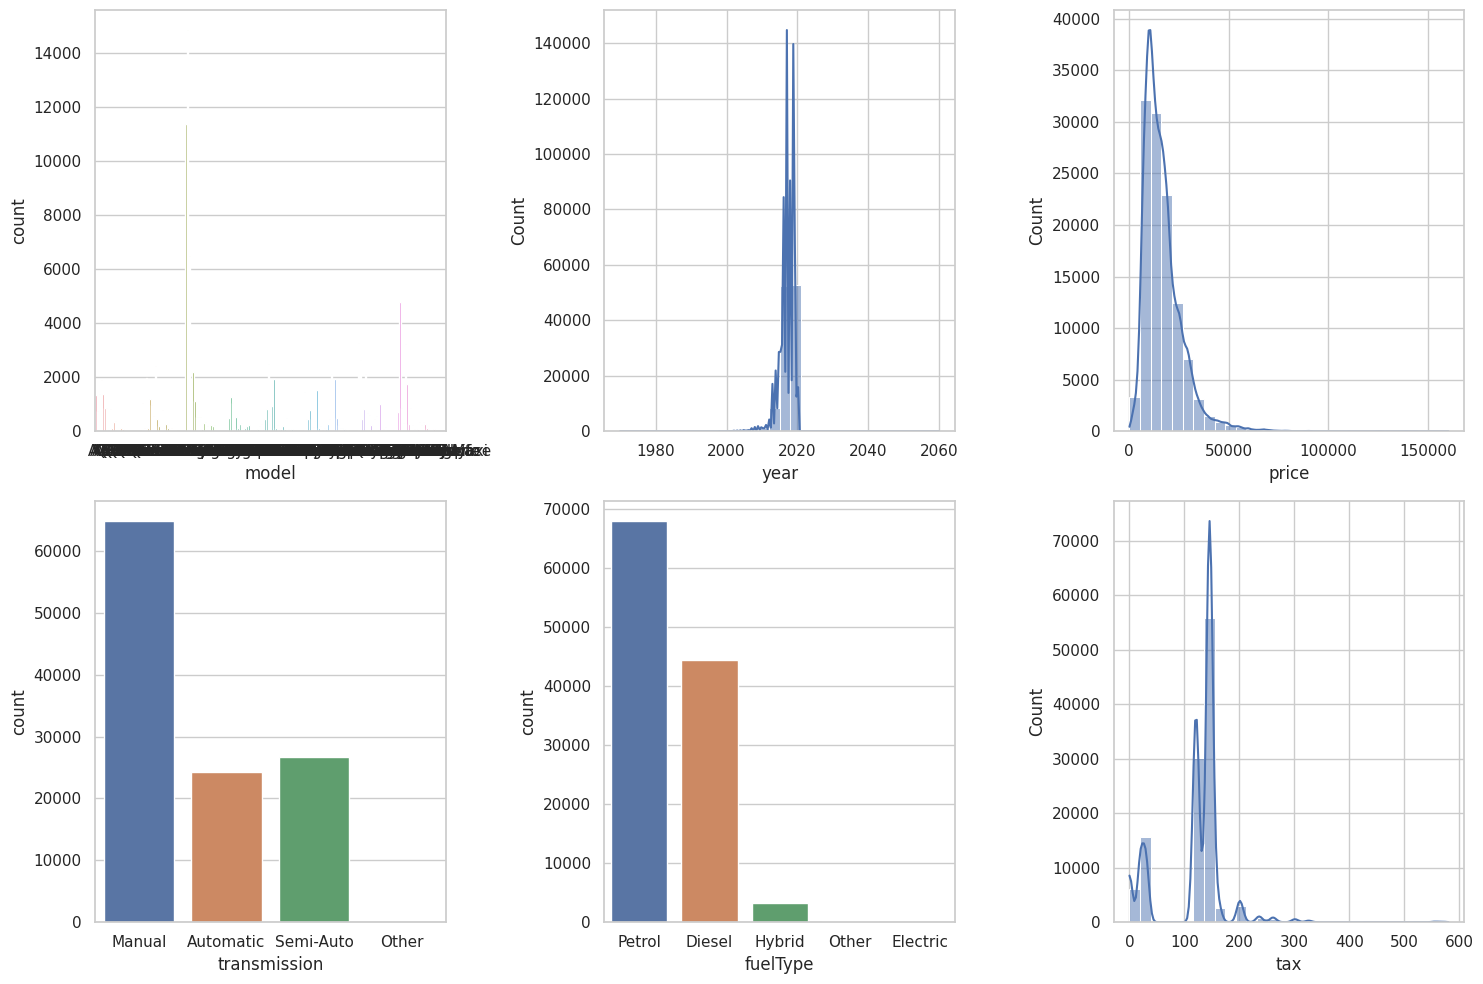

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un histograma múltiple
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, column in zip(axes.flatten(), clean_df_imputado.columns):
    if clean_df_imputado[column].dtype in ['float64', 'int64']:
        sns.histplot(ax=ax, data=clean_df_imputado, x=column, bins=30, kde=True)
    else:
        sns.countplot(ax=ax, data=clean_df_imputado, x=column)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


Análisis sobre variables numéricas

In [118]:
clean_df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115723 entries, 0 to 118149
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         115723 non-null  object 
 1   year          115723 non-null  float64
 2   price         115723 non-null  float64
 3   transmission  115723 non-null  object 
 4   fuelType      115723 non-null  object 
 5   tax           115723 non-null  float64
 6   mpg           115723 non-null  float64
 7   engineSize    115723 non-null  float64
 8   fuel type     115723 non-null  object 
dtypes: float64(5), object(4)
memory usage: 8.8+ MB


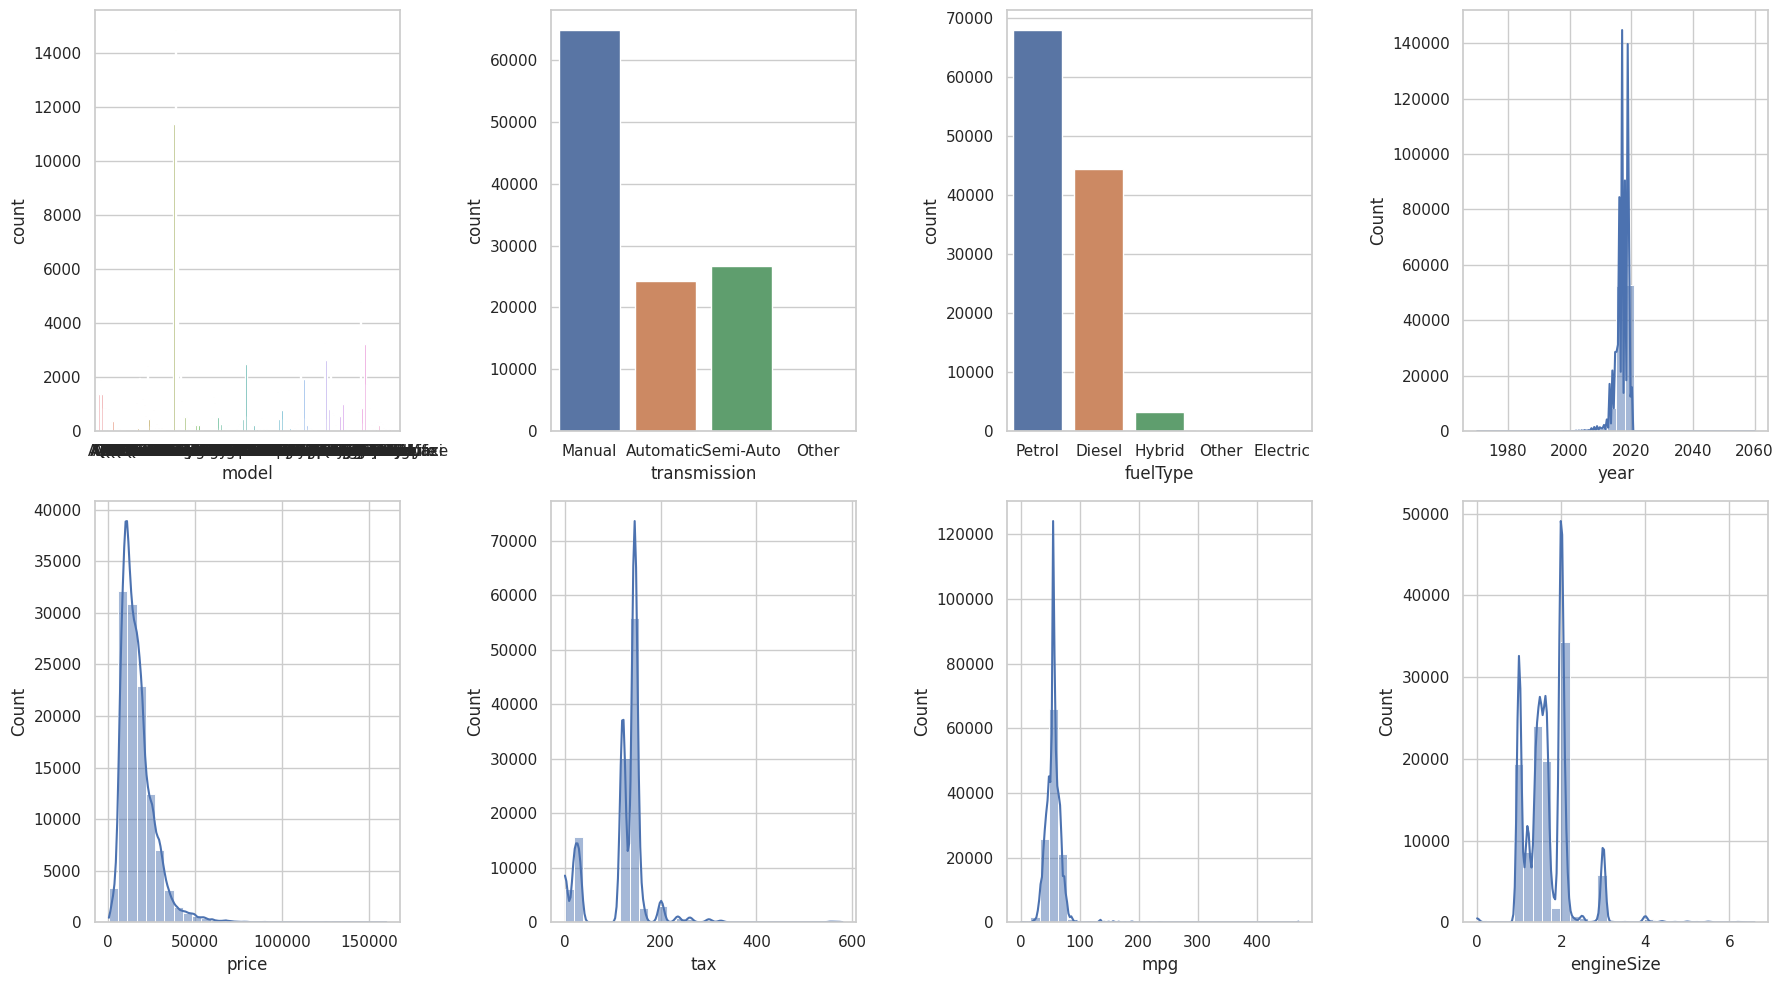

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un par de gráficos de barras y histogramas
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

# Variables categóricas: Model, Transmission, FuelType
sns.countplot(ax=axes[0, 0], data=clean_df_imputado, x="model")
sns.countplot(ax=axes[0, 1], data=clean_df_imputado, x="transmission")
sns.countplot(ax=axes[0, 2], data=clean_df_imputado, x="fuelType")

# Variables numéricas: Year, Price, Tax, MPG, EngineSize
sns.histplot(ax=axes[0, 3], data=clean_df_imputado, x="year", bins=30, kde=True)
sns.histplot(ax=axes[1, 0], data=clean_df_imputado, x="price", bins=30, kde=True)
sns.histplot(ax=axes[1, 1], data=clean_df_imputado, x="tax", bins=30, kde=True)
sns.histplot(ax=axes[1, 2], data=clean_df_imputado, x="mpg", bins=30, kde=True)
sns.histplot(ax=axes[1, 3], data=clean_df_imputado, x="engineSize", bins=30, kde=True)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


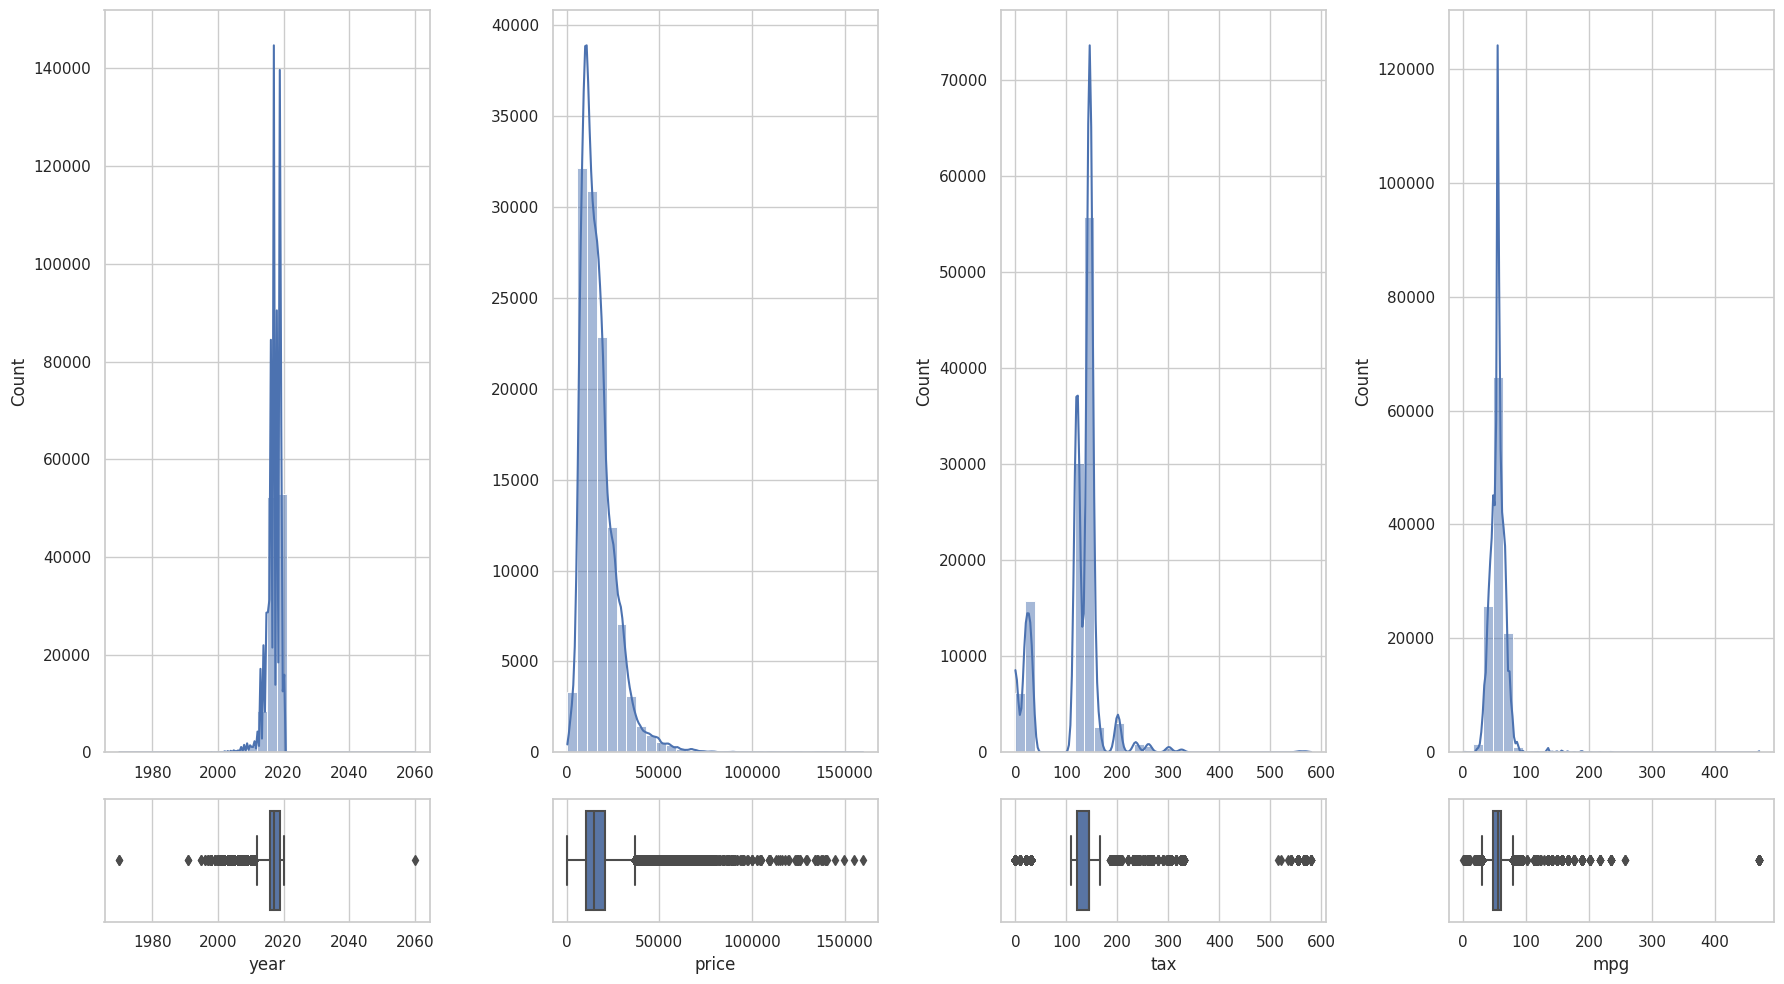

In [120]:
# Crear una figura múltiple con histogramas y diagramas de caja
fig, axis = plt.subplots(2, 4, figsize=(18, 10), gridspec_kw={'height_ratios': [6, 1]})

# Variables numéricas: Year, Price, Tax, MPG, EngineSize
sns.histplot(ax=axis[0, 0], data=clean_df_imputado, x="year", bins=30, kde=True).set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=clean_df_imputado, x="year")

sns.histplot(ax=axis[0, 1], data=clean_df_imputado, x="price", bins=30, kde=True).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=clean_df_imputado, x="price")

sns.histplot(ax=axis[0, 2], data=clean_df_imputado, x="tax", bins=30, kde=True).set(xlabel=None)
sns.boxplot(ax=axis[1, 2], data=clean_df_imputado, x="tax")

sns.histplot(ax=axis[0, 3], data=clean_df_imputado, x="mpg", bins=30, kde=True).set(xlabel=None)
sns.boxplot(ax=axis[1, 3], data=clean_df_imputado, x="mpg")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


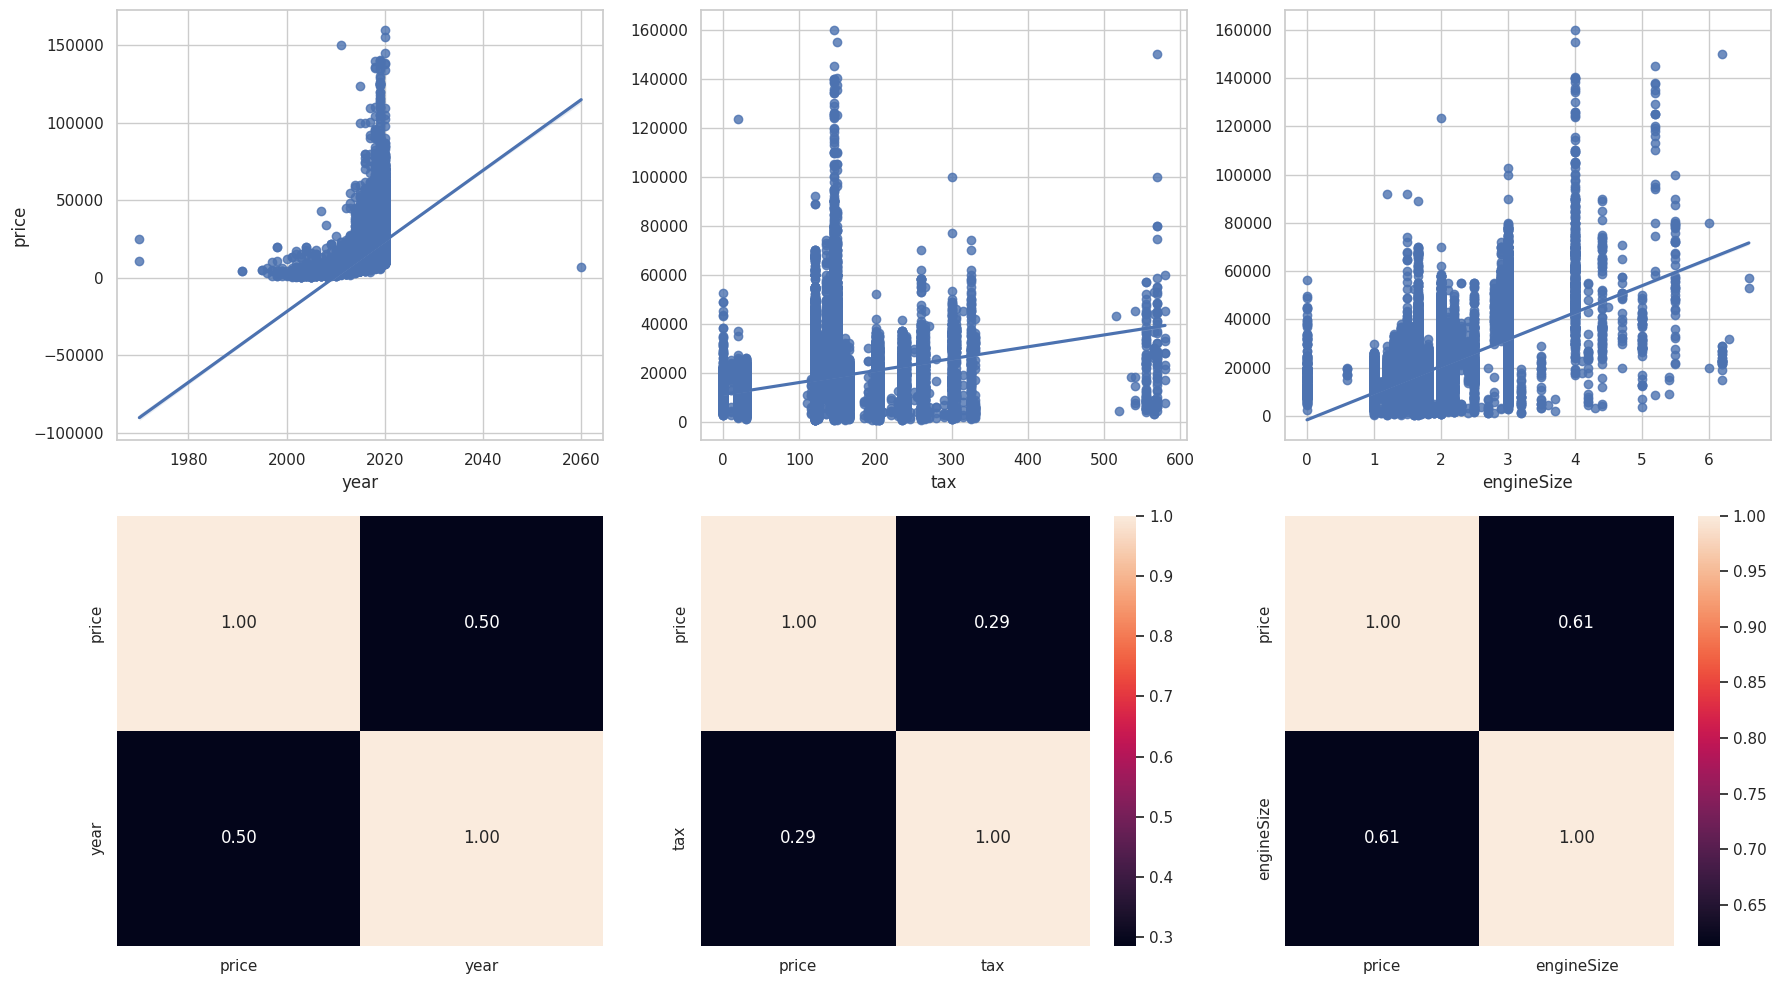

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 3, figsize=(18, 10))

# Variables: Year, Price, Tax, EngineSize
sns.regplot(ax=axis[0, 0], data=clean_df_imputado, x="year", y="price")
sns.heatmap(clean_df_imputado[["price", "year"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=clean_df_imputado, x="tax", y="price").set(ylabel=None)
sns.heatmap(clean_df_imputado[["price", "tax"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.regplot(ax=axis[0, 2], data=clean_df_imputado, x="engineSize", y="price").set(ylabel=None)
sns.heatmap(clean_df_imputado[["price", "engineSize"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


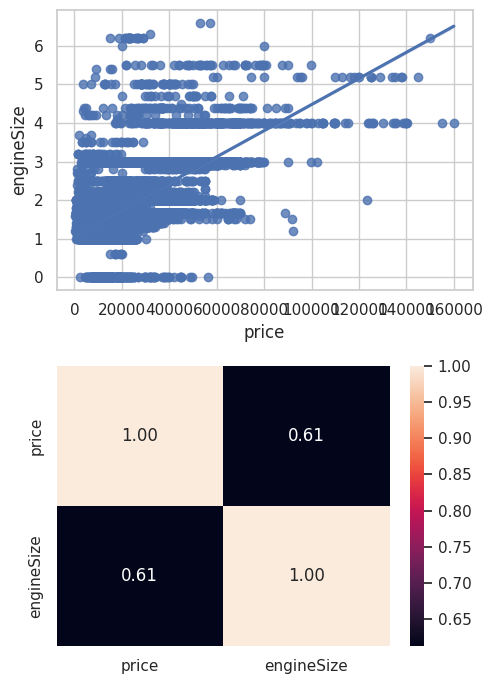

In [122]:

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

# Variables: Price, EngineSize
sns.regplot(ax=axis[0], data=clean_df_imputado, x="price", y="engineSize")
sns.heatmap(data=clean_df_imputado[["price", "engineSize"]].corr(), annot=True, fmt=".2f", ax=axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


Se puede determinar que existe una relación muy fuerte entre ambas variables y que la el tamaño del motor impacta sobre que el precio del vehículo

Análisis categórico-categórico

In [123]:
clean_df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115723 entries, 0 to 118149
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         115723 non-null  object 
 1   year          115723 non-null  float64
 2   price         115723 non-null  float64
 3   transmission  115723 non-null  object 
 4   fuelType      115723 non-null  object 
 5   tax           115723 non-null  float64
 6   mpg           115723 non-null  float64
 7   engineSize    115723 non-null  float64
 8   fuel type     115723 non-null  object 
dtypes: float64(5), object(4)
memory usage: 8.8+ MB


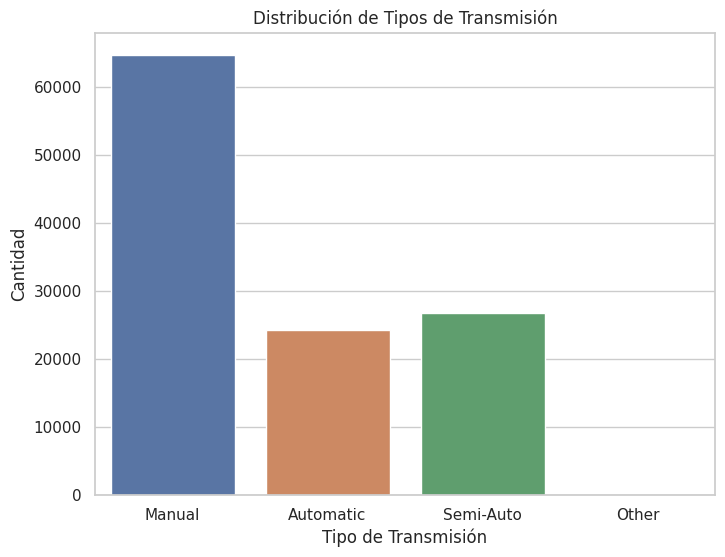

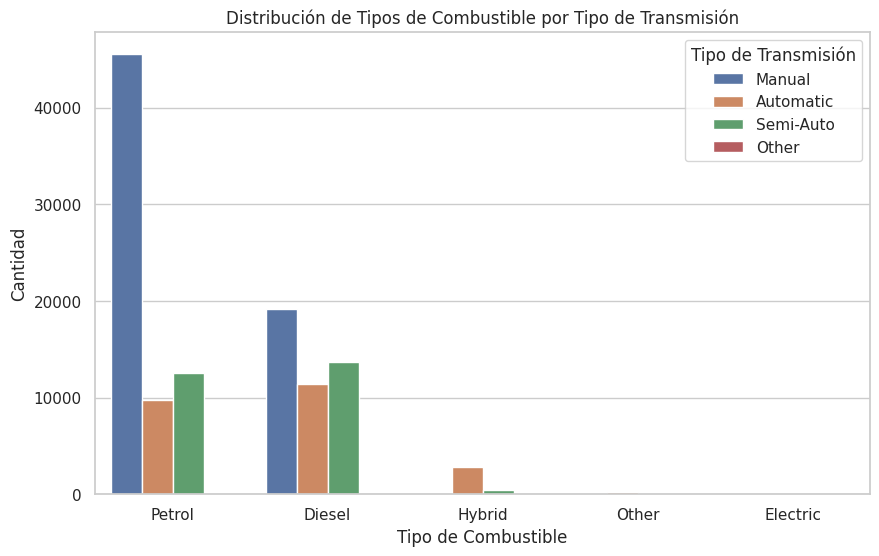

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras para la variable 'transmission'
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_df_imputado, x='transmission')
plt.title('Distribución de Tipos de Transmisión')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Cantidad')
plt.show()

# Crear un gráfico de barras apiladas para la variable 'fuelType'
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df_imputado, x='fuelType', hue='transmission')
plt.title('Distribución de Tipos de Combustible por Tipo de Transmisión')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Transmisión', loc='upper right')
plt.show()


In [125]:
print(clean_df_imputado.columns)


Index(['model', 'year', 'price', 'transmission', 'fuelType', 'tax', 'mpg',
       'engineSize', 'fuel type'],
      dtype='object')


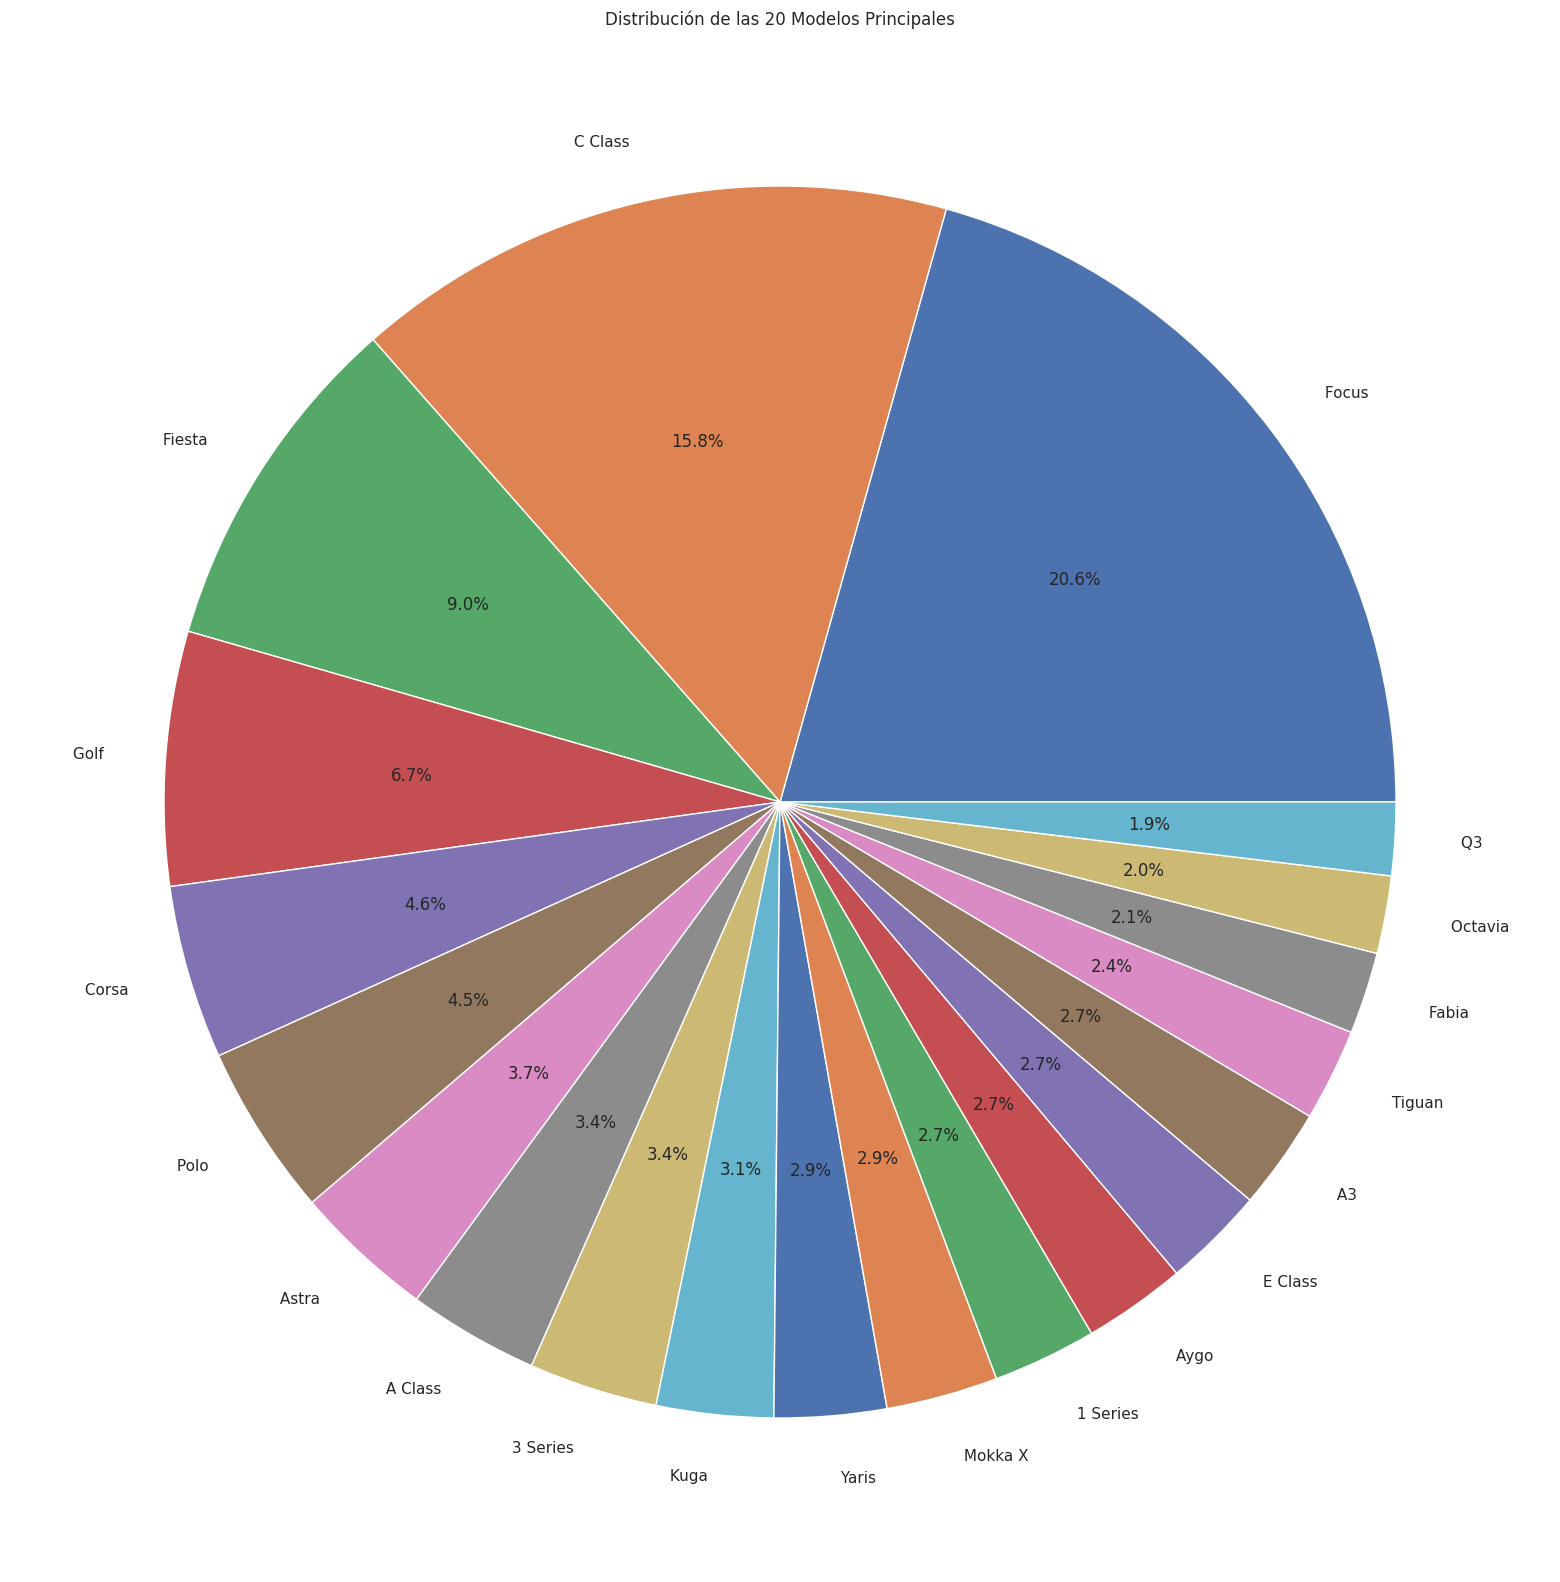

In [126]:
import matplotlib.pyplot as plt

# Obtener las 10 marcas más comunes
top_20_models = clean_df_imputado['model'].value_counts().nlargest(20).index

# Filtrar el DataFrame para incluir solo las 10 marcas principales
df_top_20_models = clean_df_imputado[clean_df_imputado['model'].isin(top_20_models)]

# Crear un gráfico de torta para la distribución de las 10 marcas principales
plt.figure(figsize=(20, 20))
df_top_20_models['model'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribución de las 20 Modelos Principales')
plt.ylabel('')
plt.show()


In [127]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(clean_df_imputado['transmission'], clean_df_imputado['fuelType'])

# Realizar la prueba chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Chi-cuadrado: {chi2}')
print(f'P-valor: {p}')

# Mostrar la tabla de contingencia
print('\nTabla de Contingencia:')
print(contingency_table)


Chi-cuadrado: 15748.860753985808
P-valor: 0.0

Tabla de Contingencia:
fuelType      Diesel  Electric  Hybrid  Other  Petrol
transmission                                         
Automatic      11464         6    2785    218    9744
Manual         19192         0      26     32   45550
Other              3         0       2      1       5
Semi-Auto      13699         0     397      1   12598


Los resultados del test chi-cuadrado y la tabla de contingencia indican una asociación significativa entre las variables categóricas "transmission" y "fuelType". Aquí hay algunas interpretaciones clave:

Chi-cuadrado: 15748.86

El valor chi-cuadrado es bastante alto, lo que sugiere que hay una diferencia significativa entre las distribuciones observadas y esperadas de las variables "transmission" y "fuelType". En otras palabras, hay una asociación significativa entre estas dos variables.
P-valor: 0.0

El p-valor es muy cercano a cero, lo que significa que hay evidencia estadística significativa para rechazar la hipótesis nula de independencia entre "transmission" y "fuelType". En este contexto, la hipótesis nula sería que no hay asociación entre las dos variables.
Tabla de Contingencia:

La tabla muestra la frecuencia de combinaciones de valores para las variables "transmission" y "fuelType". Por ejemplo, se observa que la combinación más común es "Manual" y "Petrol" con una frecuencia de 45550.
En resumen, los resultados indican que el tipo de transmisión está asociado de manera significativa con el tipo de combustible

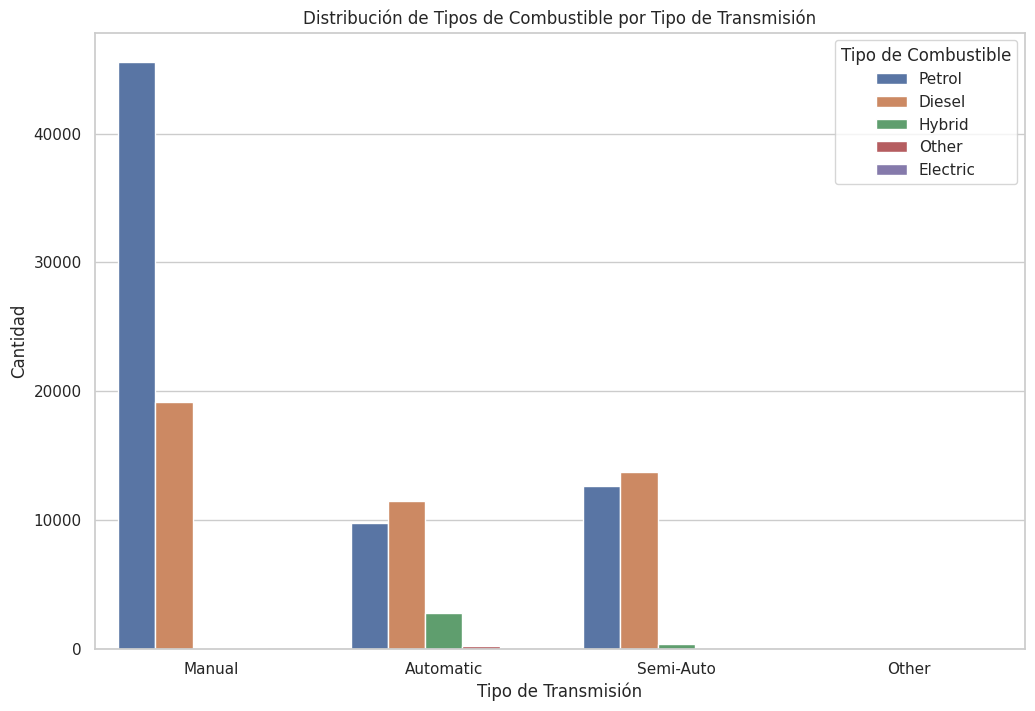

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 8))
sns.countplot(data=clean_df_imputado, x='transmission', hue='fuelType')
plt.title('Distribución de Tipos de Combustible por Tipo de Transmisión')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Combustible', loc='upper right')
plt.show()


In [129]:
clean_df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115723 entries, 0 to 118149
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         115723 non-null  object 
 1   year          115723 non-null  float64
 2   price         115723 non-null  float64
 3   transmission  115723 non-null  object 
 4   fuelType      115723 non-null  object 
 5   tax           115723 non-null  float64
 6   mpg           115723 non-null  float64
 7   engineSize    115723 non-null  float64
 8   fuel type     115723 non-null  object 
dtypes: float64(5), object(4)
memory usage: 8.8+ MB


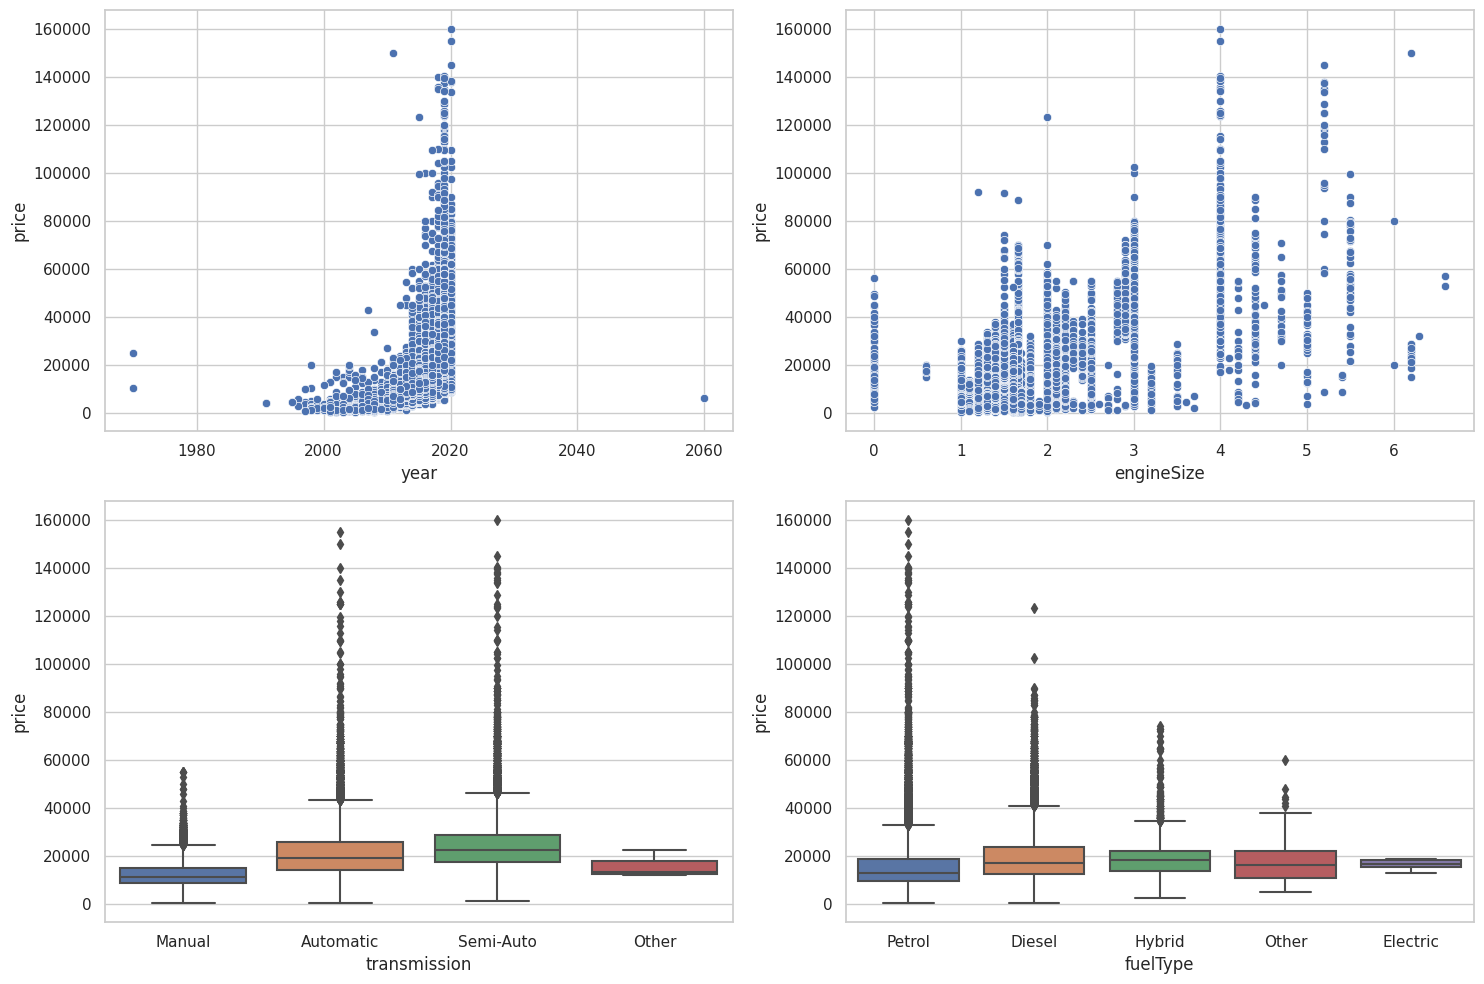

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráficos de dispersión para variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(ax=axes[0, 0], data=clean_df_imputado, x='year', y='price')
sns.scatterplot(ax=axes[0, 1], data=clean_df_imputado, x='engineSize', y='price')

# Gráficos de caja para variables categóricas
sns.boxplot(ax=axes[1, 0], data=clean_df_imputado, x='transmission', y='price')
sns.boxplot(ax=axes[1, 1], data=clean_df_imputado, x='fuelType', y='price')

# Ajustar el layout
plt.tight_layout()

plt.show()



Análisis de correlaciones

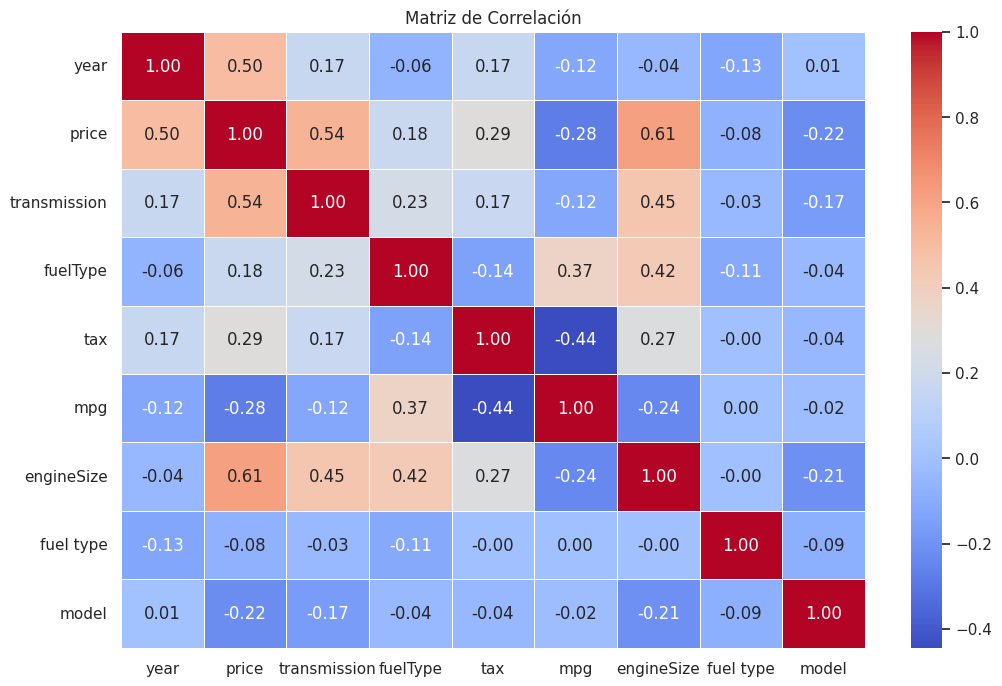

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar todas las variables
all_variables = ["year", "price", "transmission", "fuelType", "tax", "mpg", "engineSize", "fuel type", "model"]

# Crear el DataFrame con todas las variables
data_all = clean_df_imputado[all_variables]

# Codificar variables categóricas utilizando factorize
data_all_encoded = data_all.copy()
for variable in ["transmission", "fuelType", "fuel type", "model"]:
    data_all_encoded[variable] = pd.factorize(data_all[variable])[0]

# Crear la matriz de correlación
correlation_matrix = data_all_encoded.corr()

# Crear el gráfico de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

#Este código utiliza factorize para convertir las variables categóricas en variables numéricas antes de calcular la matriz de correlación y visualizarla en un gráfico de calor.

In [132]:
import pandas as pd

# Seleccionar todas las variables
all_variables = ["year", "price", "transmission", "fuelType", "tax", "mpg", "engineSize", "fuel type", "model"]

# Crear el DataFrame con todas las variables
data_all = clean_df_imputado[all_variables]

# Codificar variables categóricas utilizando factorize
data_all_encoded = data_all.copy()
for variable in ["transmission", "fuelType", "fuel type", "model"]:
    data_all_encoded[variable] = pd.factorize(data_all[variable])[0]

# Calcular la matriz de correlación
correlation_matrix = data_all_encoded.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                  year     price  transmission  fuelType           tax  \
year          1.000000  0.503223      0.169411 -0.062504  1.688208e-01   
price         0.503223  1.000000      0.539786  0.181515  2.857591e-01   
transmission  0.169411  0.539786      1.000000  0.225844  1.735957e-01   
fuelType     -0.062504  0.181515      0.225844  1.000000 -1.437243e-01   
tax           0.168821  0.285759      0.173596 -0.143724  1.000000e+00   
mpg          -0.119045 -0.276822     -0.119215  0.369888 -4.445294e-01   
engineSize   -0.039420  0.613082      0.447550  0.424459  2.683633e-01   
fuel type    -0.126969 -0.077468     -0.033445 -0.108934 -8.361996e-16   
model         0.006326 -0.219488     -0.166144 -0.035700 -3.869649e-02   

                       mpg    engineSize     fuel type     model  
year         -1.190451e-01 -3.942030e-02 -1.269691e-01  0.006326  
price        -2.768222e-01  6.130818e-01 -7.746803e-02 -0.219488  
transmission -1.192153e-01  4.475505e-01 -3.344536e-02 -0.

Interpretaciones para las correlaciones en matriz:

✅ year y price (0.50): Existe una correlación positiva moderada (0.50) entre el año y el precio. Esto podría indicar que los autos más recientes tienden a tener precios más altos.

✅ price y transmission (0.54): Hay una correlación positiva moderada (0.54) entre el precio y el tipo de transmisión. Esto podría sugerir que ciertos tipos de transmisión están asociados con precios más altos.

✅ transmission y mpg (-0.12): Existe una correlación negativa débil (-0.12) entre el tipo de transmisión y las millas por galón (mpg). Esto sugiere que ciertos tipos de transmisión podrían estar asociados con una menor eficiencia de combustible.

✅ fuelType y mpg (0.37): Hay una correlación positiva moderada (0.37) entre el tipo de combustible y las millas por galón. Esto podría indicar que ciertos tipos de combustible están asociados con una mayor eficiencia de combustible.

✅ tax y mpg (-0.44): Existe una correlación negativa moderada (-0.44) entre el impuesto y las millas por galón. Esto podría indicar que vehículos con impuestos más altos tienden a tener una menor eficiencia de combustible.

✅ engineSize y price (0.61): Hay una correlación positiva fuerte (0.61) entre el tamaño del motor y el precio. Esto sugiere que los vehículos con motores más grandes tienden a tener precios más altos.

✅ fuel type y model (-0.09): Existe una correlación negativa débil (-0.09) entre el tipo de combustible y la marca. Esto podría indicar que ciertas marcas tienen preferencias por ciertos tipos de combustible.

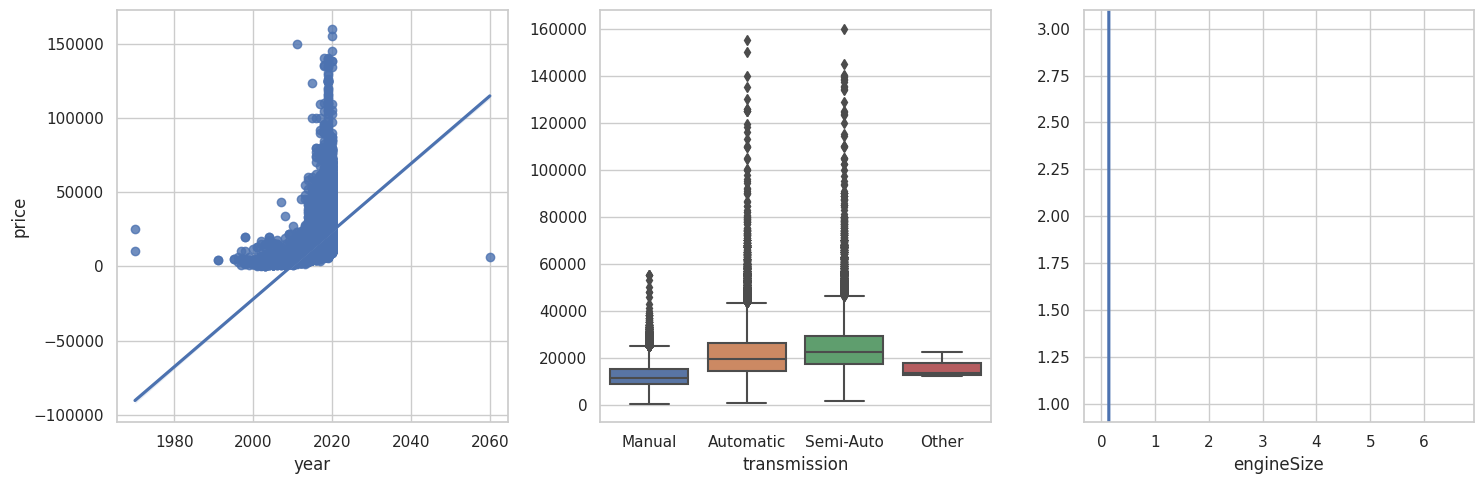

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots
fig, axes = plt.subplots(figsize=(15, 5), ncols=3)

# Primer gráfico: year vs price
sns.regplot(ax=axes[0], data=clean_df_imputado, x="year", y="price")

# Segundo gráfico: transmission vs price (boxplot en lugar de violinplot)
sns.boxplot(ax=axes[1], data=clean_df_imputado, x="transmission", y="price").set(ylabel=None)

# Tercer gráfico: engineSize vs price
sns.regplot(ax=axes[2], data=clean_df_imputado, x="engineSize", y="price").set(ylabel=None, ylim=(0.9, 3.1))

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


pairplot (es un paso opcional)

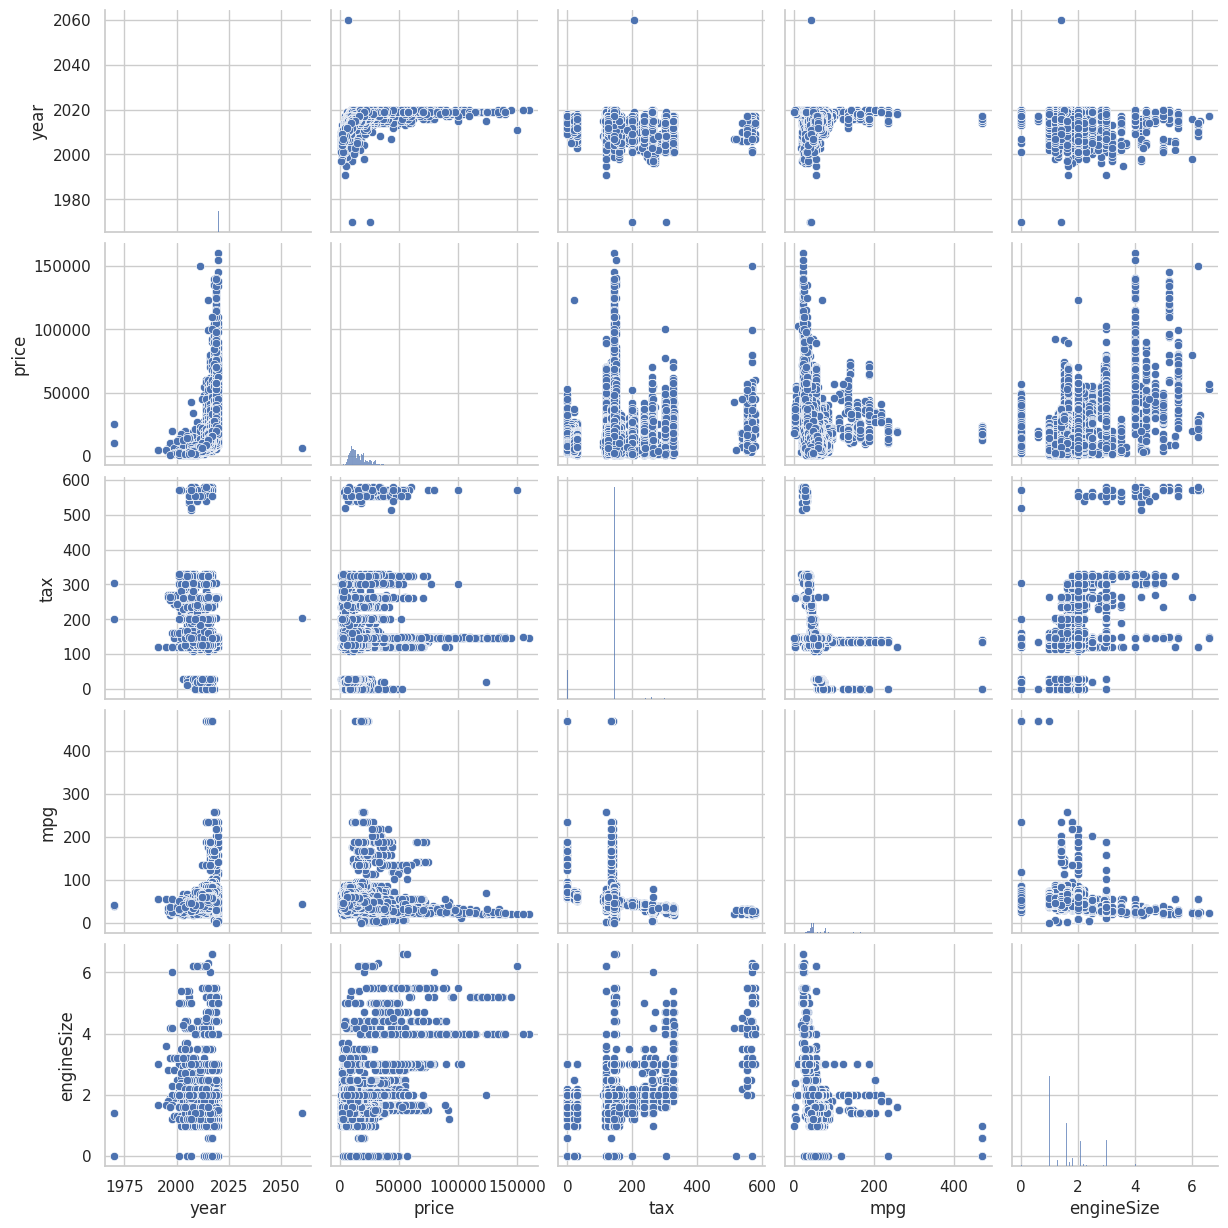

In [134]:
sns.pairplot(data = clean_df_imputado)

FIN DEL DÍA 1 - FEAUTRING ENGENEERING

Análisis de outliers

In [135]:
clean_df_imputado.describe()

,year,price,tax,mpg,engineSize
count,115723.000000,115723.000000,115723.000000,115723.000000,115723.000000
mean,2017.083153,16936.471186,120.088715,55.205623,1.664939
std,2.137097,9680.188303,57.008187,14.869173,0.534875
min,1970.000000,450.000000,0.000000,0.300000,0.000000
25%,2016.000000,10300.000000,120.088715,47.900000,1.400000
50%,2017.000000,14870.000000,145.000000,55.205623,1.600000
75%,2019.000000,20941.500000,145.000000,60.100000,2.000000
max,2060.000000,159999.000000,580.000000,470.800000,6.600000


year:

El mínimo parece ser 1970 y el máximo 2060. El año 2060 es probablemente un error de entrada o almacenamiento de datos.

price:

El máximo es 159999. Este valor podría considerarse un valor atípico dependiendo de la distribución general de los precios.

tax:

El máximo es 580. Este valor también podría considerarse un valor atípico, especialmente si la mayoría de los valores están alrededor de 145.

mpg:

El máximo es 470.8. Similar al caso anterior, este valor es significativamente mayor que el tercer cuartil (Q3), lo que sugiere que podría ser un valor atípico.

engineSize:

El mínimo es 0. Esto podría ser un error o un valor atípico dependiendo del contexto de tus datos.


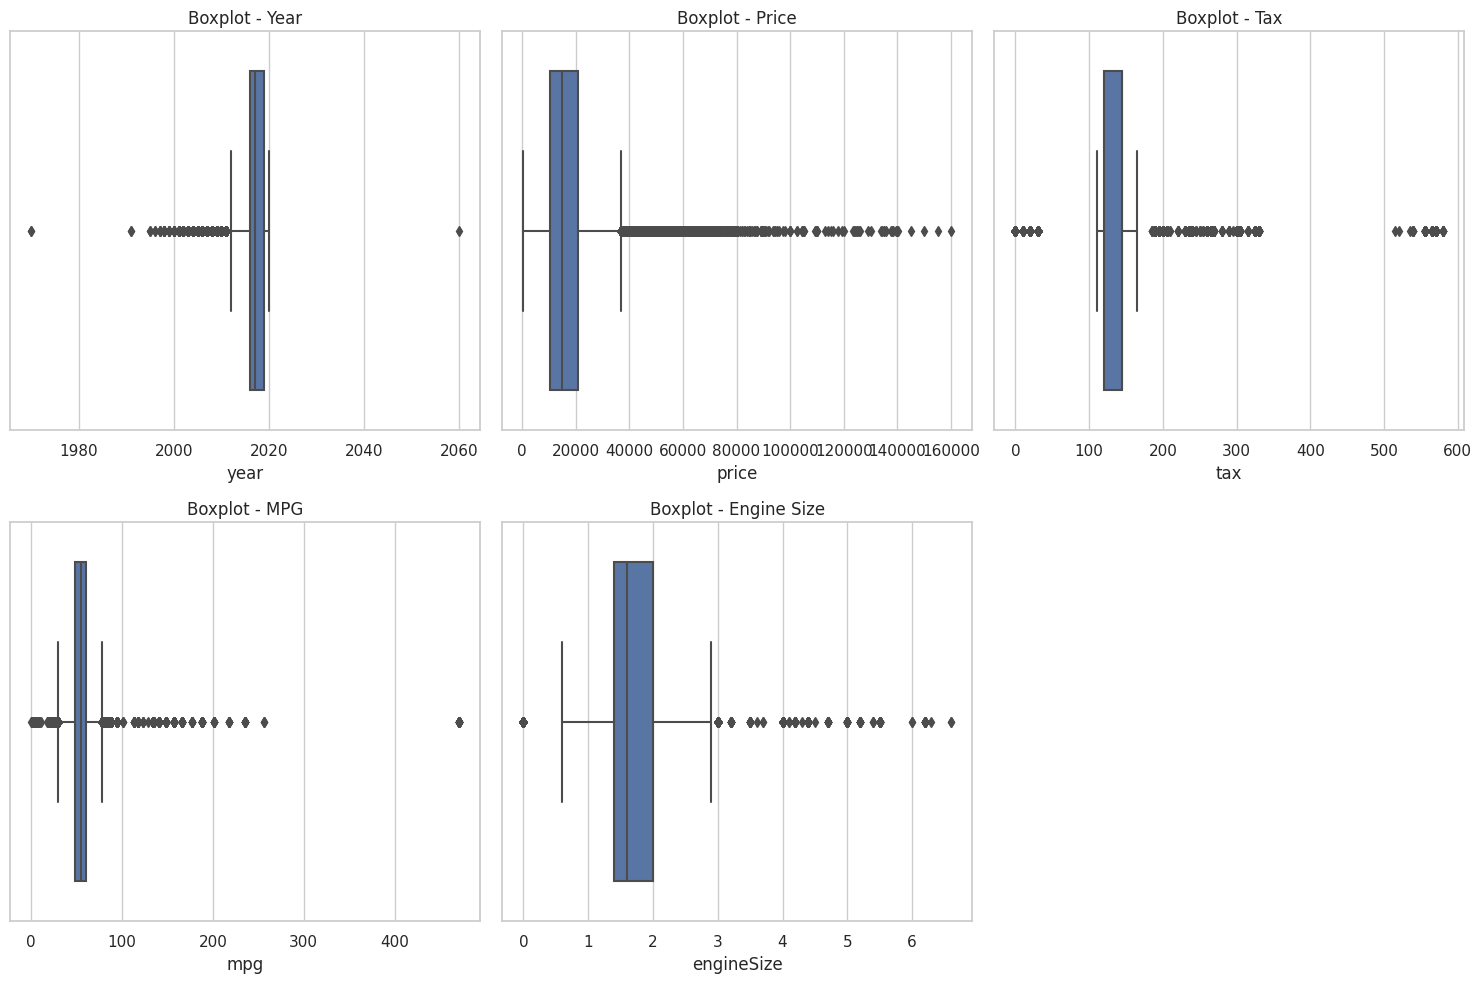

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear subgráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Boxplot para 'year'
sns.boxplot(x=clean_df_imputado['year'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot - Year')

# Boxplot para 'price'
sns.boxplot(x=clean_df_imputado['price'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot - Price')

# Boxplot para 'tax'
sns.boxplot(x=clean_df_imputado['tax'], ax=axes[0, 2])
axes[0, 2].set_title('Boxplot - Tax')

# Boxplot para 'mpg'
sns.boxplot(x=clean_df_imputado['mpg'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot - MPG')

# Boxplot para 'engineSize'
sns.boxplot(x=clean_df_imputado['engineSize'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot - Engine Size')

# Eliminar el último gráfico vacío
fig.delaxes(axes[1, 2])

# Ajustar el diseño
plt.tight_layout()

# Mostrar los boxplots
plt.show()


Eliminación de outliers

In [140]:
year_stats = clean_df_imputado["year"].describe()
year_stats

count    115723.000000
mean       2017.083153
std           2.137097
min        1970.000000
25%        2016.000000
50%        2017.000000
75%        2019.000000
max        2060.000000
Name: year, dtype: float64

In [141]:
year_iqr = year_stats["75%"] - year_stats["25%"]
upper_limit = year_stats["75%"] + 1.5 * year_iqr
lower_limit = year_stats["25%"] - 1.5 * year_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(year_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 2023.5 y 2011.5, con un rango intercuartílico de 3.0


Los límites superior e inferior proporcionados son 2023.5 y 2011.5, respectivamente, con un rango intercuartílico de 3.0.

Si un valor en la columna 'year' es mayor que 2023.5 o menor que 2011.5, se consideraría un outlier y podría ser eliminado del conjunto de datos.

In [ ]:
'''print("Número de filas antes de eliminar outliers:", len(clean_df_imputado))
print("upper")
clean_df_imputado[clean_df_imputado["year"] >= 2026.5]
print("lower")
clean_df_imputado[clean_df_imputado["year"] < 2008.5
print("Número de filas después de eliminar outliers:", len(clean_df_imputado))'''

In [142]:
'''print("Número de filas después de eliminar outliers:", len(clean_df_imputado))'''

Número de filas después de eliminar outliers: 115723


In [103]:
'''print("Número de filas antes de eliminar outliers:", len(clean_df_imputado))
clean_df_imputado = clean_df_imputado[clean_df_imputado['year'] < 2026.5]
print("Número de filas después de eliminar outliers:", len(clean_df_imputado))'''

Número de filas antes de eliminar outliers: 1
Número de filas después de eliminar outliers: 0


A partir de aqui sobrescribe el DataFrame original eliminando las filas donde el valor en la columna 'year' es mayor o igual a 2026.5. No necesitas usar drop en este caso. Eliminaremos el este valor atípico, ya que el año 2060 es incorrecto

In [39]:
'''print("lower")
clean_df_imputado[clean_df_imputado["year"] < 2008.5]'''

lower


,model,year,price,transmission,fuelType,tax,mpg,engineSize,fuel type
7403,S4,2004.0,6990.0,Automatic,Petrol,325.0,22.4,4.2,Petrol
7438,A4,2007.0,3495.0,Manual,Diesel,325.0,33.2,2.0,Petrol
7462,A5,2008.0,6995.0,Semi-Auto,Diesel,235.0,42.2,2.7,Petrol
7491,TT,2007.0,4995.0,Manual,Petrol,145.0,56.5,2.0,Petrol
7493,A3,2007.0,8488.0,Manual,Petrol,325.0,31.0,2.0,Petrol
...,...,...,...,...,...,...,...,...,...
118141,Eos,2008.0,3695.0,Automatic,Petrol,280.0,34.5,2.0,Petrol
118144,Eos,2006.0,2995.0,Manual,Diesel,200.0,48.0,2.0,Petrol
118146,Fox,2008.0,1799.0,Manual,Petrol,145.0,46.3,1.2,Petrol
118148,Fox,2006.0,1250.0,Manual,Petrol,150.0,46.3,1.2,Petrol


Cálculo del resto

In [143]:
# Calcular estadísticas descriptivas para las otras columnas
price_stats = clean_df_imputado["price"].describe()
tax_stats = clean_df_imputado["tax"].describe()
mpg_stats = clean_df_imputado["mpg"].describe()
engineSize_stats = clean_df_imputado["engineSize"].describe()

# Calcular el rango intercuartílico (IQR) para las otras columnas
price_iqr = price_stats["75%"] - price_stats["25%"]
tax_iqr = tax_stats["75%"] - tax_stats["25%"]
mpg_iqr = mpg_stats["75%"] - mpg_stats["25%"]
engineSize_iqr = engineSize_stats["75%"] - engineSize_stats["25%"]

# Calcular límites superior e inferior para las otras columnas
upper_limit_price = price_stats["75%"] + 1.5 * price_iqr
lower_limit_price = price_stats["25%"] - 1.5 * price_iqr

upper_limit_tax = tax_stats["75%"] + 1.5 * tax_iqr
lower_limit_tax = tax_stats["25%"] - 1.5 * tax_iqr

upper_limit_mpg = mpg_stats["75%"] + 1.5 * mpg_iqr
lower_limit_mpg = mpg_stats["25%"] - 1.5 * mpg_iqr

upper_limit_engineSize = engineSize_stats["75%"] + 1.5 * engineSize_iqr
lower_limit_engineSize = engineSize_stats["25%"] - 1.5 * engineSize_iqr

# Imprimir los resultados para las otras columnas
print(f"Límites superior e inferior para 'price': {round(upper_limit_price, 2)} y {round(lower_limit_price, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")
print(f"Límites superior e inferior para 'tax': {round(upper_limit_tax, 2)} y {round(lower_limit_tax, 2)}, con un rango intercuartílico de {round(tax_iqr, 2)}")
print(f"Límites superior e inferior para 'mpg': {round(upper_limit_mpg, 2)} y {round(lower_limit_mpg, 2)}, con un rango intercuartílico de {round(mpg_iqr, 2)}")
print(f"Límites superior e inferior para 'engineSize': {round(upper_limit_engineSize, 2)} y {round(lower_limit_engineSize, 2)}, con un rango intercuartílico de {round(engineSize_iqr, 2)}")


Límites superior e inferior para 'price': 36903.75 y -5662.25, con un rango intercuartílico de 10641.5
Límites superior e inferior para 'tax': 182.37 y 82.72, con un rango intercuartílico de 24.91
Límites superior e inferior para 'mpg': 78.4 y 29.6, con un rango intercuartílico de 12.2
Límites superior e inferior para 'engineSize': 2.9 y 0.5, con un rango intercuartílico de 0.6


Outliers
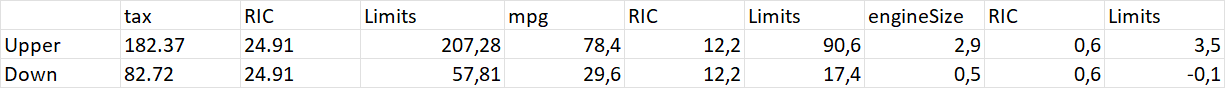

In [144]:
# Filtrar filas por encima del límite para cada variable
upper_limit_tax = clean_df_imputado[clean_df_imputado["tax"] >= 207.28]
upper_limit_mpg = clean_df_imputado[clean_df_imputado["mpg"] >= 90.6]
upper_limit_engineSize = clean_df_imputado[clean_df_imputado["engineSize"] >= 3.5]

# Imprimir el número de filas por encima del límite para cada variable
print("Número de ourliers por encima del límite para 'tax':", len(upper_limit_tax))
print("Número de outliers por encima del límite para 'mpg':", len(upper_limit_mpg))
print("Número de ouutliers por encima del límite para 'engineSize':", len(upper_limit_engineSize))


Número de ourliers por encima del límite para 'tax': 2357
Número de outliers por encima del límite para 'mpg': 636
Número de ouutliers por encima del límite para 'engineSize': 752


In [145]:
# Filtrar filas por debajo del límite para cada variable
down_limit_tax = clean_df_imputado[clean_df_imputado["tax"] <= 57.81]
down_limit_mpg = clean_df_imputado[clean_df_imputado["mpg"] <= 17.4]
down_limit_engineSize = clean_df_imputado[clean_df_imputado["engineSize"] <= -0.1]

# Imprimir el número de filas por debajo del límite para cada variable
print("Número de filas por debajo del límite para 'tax':", len(down_limit_tax))
print("Número de filas por debajo del límite para 'mpg':", len(down_limit_mpg))
print("Número de filas por debajo del límite para 'engineSize':", len(down_limit_engineSize))


Número de filas por debajo del límite para 'tax': 21856
Número de filas por debajo del límite para 'mpg': 34
Número de filas por debajo del límite para 'engineSize': 0


In [60]:
#print("Número de filas después de eliminar outliers:", len(clean_df_imputado))

Número de filas después de eliminar outliers: 0


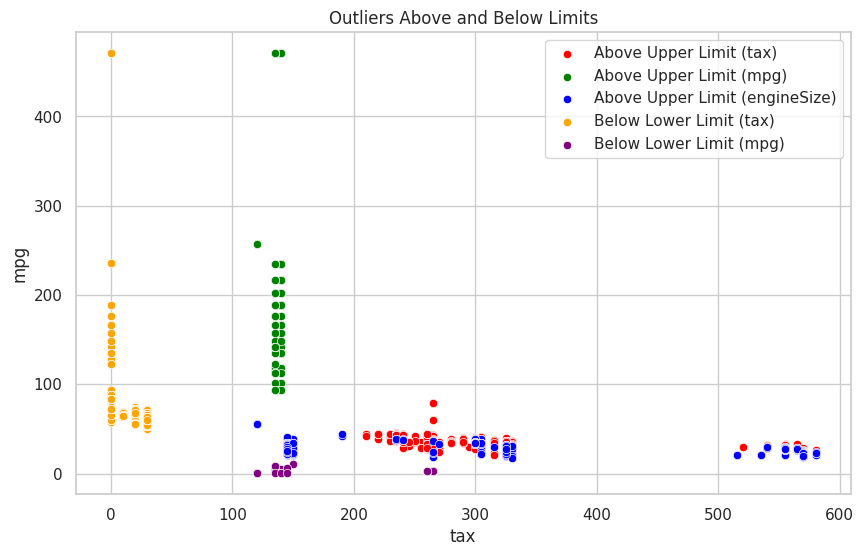

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos usando Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de dispersión con valores por encima de los límites superiores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tax', y='mpg', data=upper_limit_tax, color='red', label='Above Upper Limit (tax)')
sns.scatterplot(x='tax', y='mpg', data=upper_limit_mpg, color='green', label='Above Upper Limit (mpg)')
sns.scatterplot(x='tax', y='mpg', data=upper_limit_engineSize, color='blue', label='Above Upper Limit (engineSize)')

# Añadir valores por debajo de los límites inferiores
sns.scatterplot(x='tax', y='mpg', data=down_limit_tax, color='orange', label='Below Lower Limit (tax)')
sns.scatterplot(x='tax', y='mpg', data=down_limit_mpg, color='purple', label='Below Lower Limit (mpg)')
sns.scatterplot(x='tax', y='mpg', data=down_limit_engineSize, color='brown', label='Below Lower Limit (engineSize)')

# Ajustar diseño del gráfico
plt.title('Outliers Above and Below Limits')
plt.xlabel('tax')
plt.ylabel('mpg')
plt.legend()
plt.show()


In [59]:
clean_df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         0 non-null      object 
 1   year          0 non-null      float64
 2   price         0 non-null      float64
 3   transmission  0 non-null      object 
 4   fuelType      0 non-null      object 
 5   tax           0 non-null      float64
 6   mpg           0 non-null      float64
 7   engineSize    0 non-null      float64
 8   fuel type     0 non-null      object 
dtypes: float64(5), object(4)
memory usage: 0.0+ bytes


Mantenemos los valores atípicos

Análisis de valores faltantes¶ - >  (missing value) es un espacio que no tiene valor asignado en la observación de una variable específica.

In [146]:
clean_df_imputado.isnull().sum().sort_values(ascending=False)

model           0
year            0
price           0
transmission    0
fuelType        0
tax             0
mpg             0
engineSize      0
fuel type       0
dtype: int64

In [147]:
clean_df_imputado.isnull().sum().sort_values(ascending=False) / len(clean_df_imputado)

model           0.0
year            0.0
price           0.0
transmission    0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
fuel type       0.0
dtype: float64

Inferencia de nuevas características (va fino porque son subcategorias)

In [148]:
unique_fuel_types = clean_df_imputado["fuelType"].unique()
print("Subcategorías de fuelType:")
print(unique_fuel_types)


Subcategorías de fuelType:
['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']


In [150]:
unique_transmission_types = clean_df_imputado["transmission"].unique()
print("Subcategorías de fuelType:")
print(unique_transmission_types)

Subcategorías de fuelType:
['Manual' 'Automatic' 'Semi-Auto' 'Other']


In [154]:
#total_data["FamMembers"] = total_data["SibSp"] + total_data["Parch"]
#total_data.head()

# Crear una nueva columna 'ecologic_cars' basada en condiciones lógicas
clean_df_imputado["ecologic_cars"] = clean_df_imputado["fuelType"].isin(["Electric", "Hybrid"])

# Cambiar el tipo de la columna a cadena (si es necesario)
clean_df_imputado["ecologic_cars"] = clean_df_imputado["ecologic_cars"].astype(str)

# Asignar "Automatic" a las filas donde no sea eléctrico ni híbrido
clean_df_imputado.loc[~clean_df_imputado["ecologic_cars"].astype(bool), "ecologic_cars"] = "Automatic"

# Mostrar las primeras filas del DataFrame con la nueva columna
print(clean_df_imputado.head())

  model    year    price transmission fuelType    tax   mpg  engineSize  \
0    A1  2017.0  12500.0       Manual   Petrol  150.0  55.4         1.4   
1    A6  2016.0  16500.0    Automatic   Diesel   20.0  64.2         2.0   
2    A1  2016.0  11000.0       Manual   Petrol   30.0  55.4         1.4   
3    A4  2017.0  16800.0    Automatic   Diesel  145.0  67.3         2.0   
4    A3  2019.0  17300.0       Manual   Petrol  145.0  49.6         1.0   

  fuel type ecologic_cars  
0    Petrol         False  
1    Petrol         False  
2    Petrol         False  
3    Petrol         False  
4    Petrol         False  


Escalado de valores (sobre valores numericos)

In [155]:
clean_df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115723 entries, 0 to 118149
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   model          115723 non-null  object 
 1   year           115723 non-null  float64
 2   price          115723 non-null  float64
 3   transmission   115723 non-null  object 
 4   fuelType       115723 non-null  object 
 5   tax            115723 non-null  float64
 6   mpg            115723 non-null  float64
 7   engineSize     115723 non-null  float64
 8   fuel type      115723 non-null  object 
 9   ecologic_cars  115723 non-null  object 
dtypes: float64(5), object(5)
memory usage: 9.7+ MB


In [156]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

num_variables = ["year", "tax", "mpg", "engineSize"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(clean_df_imputado[num_variables])
total_data_norm = pd.DataFrame(norm_features, index=clean_df_imputado.index, columns=num_variables)
total_data_norm["price"] = clean_df_imputado["price"]  # Mantener la columna original de precios
total_data_norm.head()


,year,tax,mpg,engineSize,price
0,-0.038910,0.524686,0.013073,-0.495332,12500.0
1,-0.506836,-1.755698,0.604904,0.626431,16500.0
2,-0.506836,-1.580284,0.013073,-0.495332,11000.0
3,-0.038910,0.436979,0.813390,0.626431,16800.0
4,0.896944,0.436979,-0.376998,-1.243174,17300.0


Escalado Mínimo-Máximo

In [157]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

num_variables = ["year", "tax", "mpg", "engineSize"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(clean_df_imputado[num_variables])
total_data_scal = pd.DataFrame(scal_features, index=clean_df_imputado.index, columns=num_variables)
total_data_scal["price"] = clean_df_imputado["price"]  # Mantener la columna original de precios
total_data_scal.head()


,year,tax,mpg,engineSize,price
0,0.522222,0.258621,0.117109,0.212121,12500.0
1,0.511111,0.034483,0.135813,0.303030,16500.0
2,0.511111,0.051724,0.117109,0.212121,11000.0
3,0.522222,0.250000,0.142402,0.303030,16800.0
4,0.544444,0.250000,0.104782,0.151515,17300.0


FIN DEL DÍA 2

DÍA 3
Paso 6: Selección de características

In [159]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Variables numéricas a escalar y seleccionar características
num_variables = ["year", "tax", "mpg", "engineSize"]

# Escalado min-max
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(clean_df_imputado[num_variables])
total_data_norm = pd.DataFrame(scaled_features, index=clean_df_imputado.index, columns=num_variables)
total_data_norm["price"] = clean_df_imputado["price"]  # Mantener la columna original de precios

# División del conjunto de datos en entrenamiento (train) y pruebas (test)
X = total_data_norm.drop("price", axis=1)
y = total_data_norm["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selección de características con chi2 y k='all' para seleccionar todas las características disponibles
selection_model = SelectKBest(chi2, k='all')
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()



,year,tax,mpg,engineSize
0,0.544444,0.250000,0.083953,0.454545
1,0.522222,0.250000,0.139001,0.303030
2,0.522222,0.000000,0.175983,0.227273
3,0.544444,0.250000,0.124548,0.151515
4,0.511111,0.034483,0.145802,0.242424


In [160]:
X_test_sel.head()

,year,tax,mpg,engineSize
0,0.544444,0.207050,0.116696,0.252264
1,0.522222,0.207050,0.127099,0.151515
2,0.488889,0.207050,0.112646,0.257576
3,0.544444,0.250000,0.108608,0.151515
4,0.522222,0.258621,0.087566,0.212121


In [161]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

In [162]:
X_train_sel.to_csv("clean_price_train.csv", index=False)
X_test_sel.to_csv("clean_price_test.csv", index=False)

In [163]:
X_train_sel.to_csv("clean_price_train.csv", index=False)
X_test_sel.to_csv("clean_price_test.csv", index=False)